# Lab 8: Define and Solve an ML Problem of Your Choosing

In [72]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [96]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Data Set Chosen:
airbnbListingsData.csv (Airbnb NYC Listings Dataset)

Prediction Target (Label):
price — the nightly price of an Airbnb listing.

Type of problem: This is a supervised learning problem because we are training a model from input features and known output labels (price). It is also specifically a regression problem because price is a continuous numeric variable (not categories).

ML task: Regression

Features:'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'number_of_reviews', 'review_scores_rating', 'host_is_superhost'

Importance:
Predicting listing prices is beneficial for Airbnb in that it can maximize revenue, support host pricing strategies, and establish trust with guests. Moreover, introducing a price prediction model will provide smart pricing recommendations, improve search result ranking, and lead to increased bookings, which adds value for the company and its stakeholders.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [97]:
selected_columns = [
    'price', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
    'beds', 'amenities', 'number_of_reviews', 'review_scores_rating',
    'host_is_superhost'
]
df = df[selected_columns]




In [98]:
df['bedrooms_is_null'] = df['bedrooms'].isna().astype(int)
df['beds_is_null'] = df['beds'].isna().astype(int)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)


In [99]:
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.strip('{}').split(',')))
df.drop(columns='amenities', inplace=True)


In [100]:
df = pd.get_dummies(df, columns=['host_is_superhost'], drop_first=False)
df = pd.get_dummies(df, columns=['room_type'], drop_first=False)


print(df.columns.tolist())


['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'bedrooms_is_null', 'beds_is_null', 'amenities_count', 'host_is_superhost_True', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

In [84]:
We analyzed the data and conducted exploratory data analysis (EDA) to create a new list of features that eliminated irrelevant and likely mis-formatted variables. The new list of features I've included:

accommodates

bathrooms

bedrooms

beds

number_of_reviews

review_scores_rating

bedrooms_is_null (binary variable if bedrooms is null)

beds_is_null (binary variable if beds is null)

amenities_count (number of amenities with the listing)

room_type_Private room

room_type_Shared room

host_is_superhost_True

We chose these features based on their possible relationships to the target variable (price) for our analysis and data integrity. I also excluded low-quality features or features that are too lengthy and challenging to model, such as name, description and neighborhood_overview; these kinds of variables would need to be pre-processed using NLP раньше they could be utilized.



SyntaxError: invalid syntax (2175429543.py, line 1)

In [49]:
Data Preparation Techniques
To transform the data to be utilized for modeling, we followed these steps:
Dealing with Missing Values:
Tracked missing values for bedrooms and beds by adding binary indicator columns (*_is_null), in addition to imputing the missing values using median to not let outliers skew the data.
Feature Encoding:
Used one-hot encoding for categorical features (room_type and host_is_superhost) by applying pd.get_dummies().
Feature Engineering:
Created a new numeric feature amenities_count by counting the amenities listed per listing.
Feature Scaling:
In order to standardize the data for models that are sensitive to feature magnitudes (neural networks), for example, we will also be using StandardScaler.

SyntaxError: invalid syntax (2007026051.py, line 1)

In [50]:
Machine Learning Models
We have two modeling methods to use: 

Decision Tree Regressor:
A tree-based model that is able to deal with non-linear relationships and does not require feature scaling. 
Useful as a strong and interpretable baseline.

MLPRegressor (Multi-layer Perceptron Neural Network):
A feedforward neural network model from sklearn.neural_network. 
Can model complicated features in the data. 
Requires standardized features and sufficiently careful tuning of hyperparameters (e.g. hidden_layer_sizes, alpha, learning_rate_init).

SyntaxError: invalid syntax (1811236389.py, line 1)

In [51]:
In order to generalize and improve performance, we followed this outline:


Train/Test Split:


The data will be split into training and testing sets following an 80 / 20 ratio.


Initial Training:


Each model will be trained on the training data using defaults or a basic set of hyperparameters.


Evaluation Metric:


Each model will be scored on the test set using Mean Squared Error (MSE).


Since MSE is an evaluation metric that is used for regression, it will penalize larger errors more so than traditional metrics.


Developing Models:


Hyperparameter tuning will take place following a grid search or manual tuning:


Decision Tree: tune max_depth, min_samples_split, etc.


MLP: tune hidden_layer_sizes, alpha, and consider increasing max_iter if it displays a convergence warning.


If it appears we have overfitting or noise we can choose to review feature selection.


Results Comparison:


MSE scores will be reviewed across models, and the model with the best test set performance will be kept.

SyntaxError: invalid syntax (2847276638.py, line 1)

In [ ]:
Models:
Baseline: Decision Tree Regressor

Advanced: MLPRegressor (Neural Net)

Evaluation Metric:
Mean Squared Error (MSE)

Model Improvement Plan:
Tune hyperparameters (max_depth, min_samples_leaf for Decision Tree; hidden_layer_sizes, alpha, learning_rate_init for MLP).

Possibly normalize features for MLP using StandardScaler.



<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [101]:
# Scikit-learn tools for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [102]:
# Define feature columns and target variable
print(df.columns.tolist())

features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'number_of_reviews', 'review_scores_rating',
    'bedrooms_is_null', 'beds_is_null', 'amenities_count',
    'room_type_Private room', 'room_type_Shared room', 'host_is_superhost_True'
]

X = df[features]
y = df['price']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'bedrooms_is_null', 'beds_is_null', 'amenities_count', 'host_is_superhost_True', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']


In [103]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

print("Decision Tree MSE:", dt_mse)


Decision Tree MSE: 12763.349821754375


In [104]:
# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP Regressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    alpha=0.001,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Predict and evaluate
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)

print("MLP Regressor MSE:", mlp_mse)


MLP Regressor MSE: 11448.632563731924


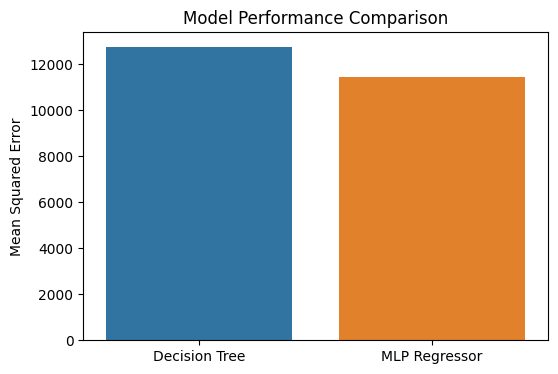

In [105]:
models = ['Decision Tree', 'MLP Regressor']
mse_scores = [dt_mse, mlp_mse]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=mse_scores)
plt.ylabel("Mean Squared Error")
plt.title("Model Performance Comparison")
plt.show()


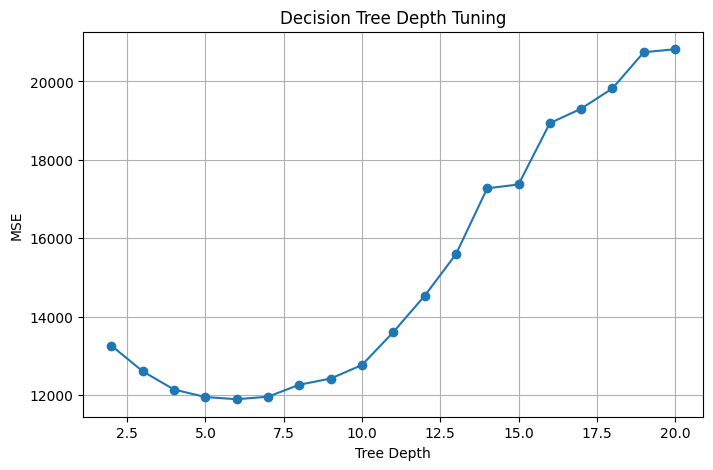

In [106]:
depths = list(range(2, 21))
mse_values = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_values.append(mse)

# Plot MSE by tree depth
plt.figure(figsize=(8, 5))
plt.plot(depths, mse_values, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Decision Tree Depth Tuning")
plt.grid(True)
plt.show()
